In [36]:
# Develop code to pull gridded Bay (SFEI) wind and 
# COAMPS wind, trim to grid and add to a met dataset.
from stompy.grid import unstructured_grid
from stompy.spatial import field
import matplotlib.pyplot as plt
import numpy as np
import six
import xarray as xr
from stompy.io.local import coamps
%matplotlib notebook

In [5]:
ls

bathy.py               log-03a
cache/                 log-03b
calibration.ipynb      log-03c
check_crash.ipynb      log-merge_003
check_edgedata.py      log-merge_003b
check_grid.ipynb       log-merge_004
check_hycom_depth.py   log-v03
check_hycom_volume.py  log-v03a
check_layers.py        log-v03b
check_wind.ipynb       log-v04a
combine_wind.ipynb     merged_sun.py
debug_restart.ipynb    ocean_sun.py
dev_add_levees.py      polaris_ic.py
dev_salt_ic.py         __pycache__/
download_hycom.py      runs/
grid-merged/           sfbay_sun.py
grid.nc                sfb_common.py
grid-sfbay/            sfb_common.py~
hycom_ic.py            sfei_wind.py
linear_features.cpg    sfei_wind.py~
linear_features.dbf    sun-template.dat
linear_features.prj    wind_natneighbor_WY2017.amu
linear_features.qpj    wind_natneighbor_WY2017.amv
linear_features.shp    wind_natneighbor_WY2017.nc
linear_features.shx    wind_natneighbor_WY2017_percent_reporting.png


<IPython.core.display.Javascript object>


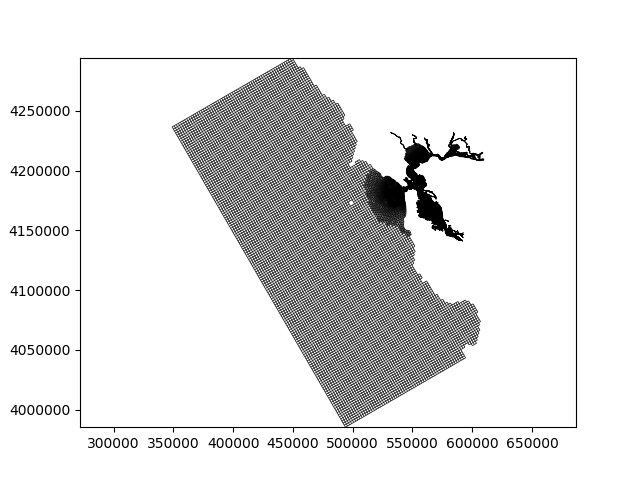

In [6]:
# Load the target grid
g=unstructured_grid.UnstructuredGrid.from_ugrid('grid-merged/spliced_grids_01_bathy.nc')
plt.figure()
g.plot_edges(color='k',lw=0.5)

In [47]:
period_start=np.datetime64("2017-06-10")
period_stop=np.datetime64("2017-06-15")

In [11]:
six.moves.reload_module(coamps)
coamps_ds=coamps.coamps_press_windxy_dataset(g.bounds(),
                                             period_start,period_stop
                                             cache_dir='cache')

2017-06-10 00:00
2017-06-10 01:00
2017-06-10 02:00
2017-06-10 03:00
2017-06-10 04:00
2017-06-10 05:00
2017-06-10 06:00
2017-06-10 07:00
2017-06-10 08:00
2017-06-10 09:00
2017-06-10 10:00
2017-06-10 11:00
2017-06-10 12:00
2017-06-10 13:00
2017-06-10 14:00
2017-06-10 15:00
2017-06-10 16:00
2017-06-10 17:00
2017-06-10 18:00
2017-06-10 19:00
2017-06-10 20:00
2017-06-10 21:00
2017-06-10 22:00
2017-06-10 23:00
2017-06-11 00:00
2017-06-11 01:00
2017-06-11 02:00
2017-06-11 03:00
2017-06-11 04:00
2017-06-11 05:00
2017-06-11 06:00
2017-06-11 07:00
2017-06-11 08:00
2017-06-11 09:00
2017-06-11 10:00
2017-06-11 11:00
2017-06-11 12:00
2017-06-11 13:00
2017-06-11 14:00
2017-06-11 15:00
2017-06-11 16:00
2017-06-11 17:00
2017-06-11 18:00
2017-06-11 19:00
2017-06-11 20:00
2017-06-11 21:00
2017-06-11 22:00
2017-06-11 23:00
2017-06-12 00:00
2017-06-12 01:00
2017-06-12 02:00
2017-06-12 03:00
2017-06-12 04:00
2017-06-12 05:00
2017-06-12 06:00
2017-06-12 07:00
2017-06-12 08:00
2017-06-12 09:00
2017-06-12 10:

In [49]:
sfei_ds=xr.open_dataset('wind_natneighbor_WY2017.nc')
# SFEI data is PST
print(sfei_ds.time.values[0])
sfei_ds.time.values[:] += np.timedelta64(7*3600,'s')
print(sfei_ds.time.values[0]) # just to be sure it took.
sfei_ds.time.attrs['timezone']='UTC'

2017-01-01T00:00:00.000000000
2017-01-01T07:00:00.000000000


In [20]:
met_ds=xr.open_dataset('/opt/sfb_ocean/suntans/runs/merge_004-20170610/Estuary_MetForcing.nc')

In [21]:
# relevant details:
# there is a single met time coordinate.  That's fine.
met_ds

<xarray.Dataset>
Dimensions:  (NPair: 1, NRH: 1, NTair: 1, NUwind: 1, NVwind: 1, Ncloud: 1, Nrain: 1, nt: 4)
Coordinates:
  * nt       (nt) datetime64[ns] 2017-06-14 2017-06-15 2017-07-01 2017-07-02
Dimensions without coordinates: NPair, NRH, NTair, NUwind, NVwind, Ncloud, Nrain
Data variables:
    Time     (nt) datetime64[ns] ...
    x_Uwind  (NUwind) float64 ...
    y_Uwind  (NUwind) float64 ...
    z_Uwind  (NUwind) int64 ...
    x_Vwind  (NVwind) float64 ...
    y_Vwind  (NVwind) float64 ...
    z_Vwind  (NVwind) int64 ...
    x_Tair   (NTair) float64 ...
    y_Tair   (NTair) float64 ...
    z_Tair   (NTair) int64 ...
    x_Pair   (NPair) float64 ...
    y_Pair   (NPair) float64 ...
    z_Pair   (NPair) int64 ...
    x_RH     (NRH) float64 ...
    y_RH     (NRH) float64 ...
    z_RH     (NRH) int64 ...
    x_rain   (Nrain) float64 ...
    y_rain   (Nrain) float64 ...
    z_rain   (Nrain) int64 ...
    x_cloud  (Ncloud) float64 ...
    y_cloud  (Ncloud) float64 ...
    z_cloud  (Ncl

INFO:join_features:0 open strings, 20 simple polygons
INFO:join_features:Building index
INFO:join_features:done building index
INFO:join_features:Examining largest poly left with area=38248243981.828690, 19 potential interiors


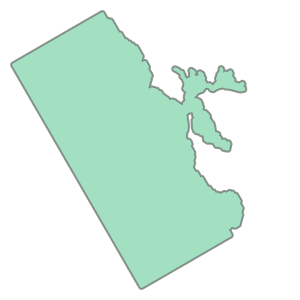

In [34]:
from shapely import geometry
g_poly=geometry.Polygon(g.boundary_polygon().exterior).buffer(3000)
g_poly

In [45]:
# Now the merge:
# For each of the sources, which points will be included?
# set a mask variable for each dataset
sfei_ds # time,x,y wind_u (time,y,x), wind_v (time,y,x)
coamps_ds # time,x,y, wind_u (time,y,x), wind_v (time,y,x)

for src_ds in [sfei_ds,coamps_ds]:
    fld=field.SimpleGrid(extents=[src_ds.x.values[0],
                                  src_ds.x.values[-1],
                                  src_ds.y.values[0],
                                  src_ds.y.values[-1]],
                         F=src_ds.wind_u.isel(time=0).values)
    #X,Y=np.meshgrid(src_ds.x.values,src_ds.y.values)
    #assert X.shape==src_ds.wind_u.shape[1:]
    #xy=np.c_[X.ravel(),Y.ravel()]
    print("Gridded resolution: ",fld.dx,fld.dy)
    mask=fld.polygon_mask(g_poly)
    print("%d of %d samples fall within grid"%(mask.sum(),mask.size))
    src_ds['mask']=src_ds.wind_u.dims[1:], mask


Gridded resolution:  1500.0 1500.0
3082 of 11211 samples fall within grid
Gridded resolution:  3648.941066184297 3648.941066184291
3206 of 7176 samples fall within grid


In [53]:
#  Trim to the same period
# SFEI
time_slc=(sfei_ds.time.values>=period_start) & (sfei_ds.time.values<=period_stop)
sfei_sub_ds=sfei_ds.isel(time=time_slc)

# COAMPS
time_slc=(coamps_ds.time.values>=period_start) & (coamps_ds.time.values<=period_stop)
coamps_sub_ds=coamps_ds.isel(time=time_slc)


In [54]:
sfei_sub_ds.time

<xarray.DataArray 'time' (time: 121)>
array(['2017-06-10T00:00:00.000000000', '2017-06-10T01:00:00.000000000',
       '2017-06-10T02:00:00.000000000', '2017-06-10T03:00:00.000000000',
       '2017-06-10T04:00:00.000000000', '2017-06-10T05:00:00.000000000',
       '2017-06-10T06:00:00.000000000', '2017-06-10T07:00:00.000000000',
       '2017-06-10T08:00:00.000000000', '2017-06-10T09:00:00.000000000',
       '2017-06-10T10:00:00.000000000', '2017-06-10T11:00:00.000000000',
       '2017-06-10T12:00:00.000000000', '2017-06-10T13:00:00.000000000',
       '2017-06-10T14:00:00.000000000', '2017-06-10T15:00:00.000000000',
       '2017-06-10T16:00:00.000000000', '2017-06-10T17:00:00.000000000',
       '2017-06-10T18:00:00.000000000', '2017-06-10T19:00:00.000000000',
       '2017-06-10T20:00:00.000000000', '2017-06-10T21:00:00.000000000',
       '2017-06-10T22:00:00.000000000', '2017-06-10T23:00:00.000000000',
       '2017-06-11T00:00:00.000000000', '2017-06-11T01:00:00.000000000',
       '2017-

In [56]:
coamps_sub_ds.time

<xarray.DataArray 'time' (time: 121)>
array(['2017-06-10T00:00:00.000000000', '2017-06-10T01:00:00.000000000',
       '2017-06-10T02:00:00.000000000', '2017-06-10T03:00:00.000000000',
       '2017-06-10T04:00:00.000000000', '2017-06-10T05:00:00.000000000',
       '2017-06-10T06:00:00.000000000', '2017-06-10T07:00:00.000000000',
       '2017-06-10T08:00:00.000000000', '2017-06-10T09:00:00.000000000',
       '2017-06-10T10:00:00.000000000', '2017-06-10T11:00:00.000000000',
       '2017-06-10T12:00:00.000000000', '2017-06-10T13:00:00.000000000',
       '2017-06-10T14:00:00.000000000', '2017-06-10T15:00:00.000000000',
       '2017-06-10T16:00:00.000000000', '2017-06-10T17:00:00.000000000',
       '2017-06-10T18:00:00.000000000', '2017-06-10T19:00:00.000000000',
       '2017-06-10T20:00:00.000000000', '2017-06-10T21:00:00.000000000',
       '2017-06-10T22:00:00.000000000', '2017-06-10T23:00:00.000000000',
       '2017-06-11T00:00:00.000000000', '2017-06-11T01:00:00.000000000',
       '2017-

In [57]:
assert np.all( sfei_sub_ds.time.values == coamps_sub_ds.time.values )
# Good